In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Electric_Vehicle_Population_Data (1).csv")

In [3]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [5]:
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 575 missing values in the data.


In [24]:
df['Electric Range'].replace(to_replace=np.nan,value=df['Electric Range'].mean(), inplace=True) 
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 575 missing values in the data.


In [25]:
range_outliers=df[df['Electric Range']>50] 
range_outliers['Electric Range'].shape 

(50490,)

**Get all the cars and their types that do not qualify for clean alternative fuel vehicle**

In [6]:
df1 = df[["Make","Electric Vehicle Type","Clean Alternative Fuel Vehicle (CAFV) Eligibility"]]

In [7]:
df1["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value = 'Eligibility unknown as battery range has not b'

In [8]:
df1

,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
1,HONDA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible
2,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
3,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
4,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
...,...,...,...
130438,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130439,NISSAN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130440,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130441,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible


In [9]:
 df1.loc[df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible'].values[0:]

array([['TESLA', 'Battery Electric Vehicle (BEV)',
        'Clean Alternative Fuel Vehicle Eligible'],
       ['HONDA', 'Plug-in Hybrid Electric Vehicle (PHEV)',
        'Clean Alternative Fuel Vehicle Eligible'],
       ['TESLA', 'Battery Electric Vehicle (BEV)',
        'Clean Alternative Fuel Vehicle Eligible'],
       ...,
       ['TESLA', 'Battery Electric Vehicle (BEV)',
        'Clean Alternative Fuel Vehicle Eligible'],
       ['TESLA', 'Battery Electric Vehicle (BEV)',
        'Clean Alternative Fuel Vehicle Eligible'],
       ['TESLA', 'Battery Electric Vehicle (BEV)',
        'Clean Alternative Fuel Vehicle Eligible']], dtype=object)

**Get all the cars that have an electric range of more than 100, and were made after
2015**

In [10]:
display(df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015),['Make','Electric Range','Model Year']])

,Make,Electric Range,Model Year
0,TESLA,238,2018
2,TESLA,220,2019
4,TESLA,210,2017
12,TESLA,308,2020
13,TESLA,322,2020
...,...,...,...
130417,TESLA,291,2020
130428,NISSAN,151,2018
130432,TESLA,291,2020
130436,TESLA,215,2018


**Draw plots to show the distribution between city and electric vehicle type**

In [11]:
import matplotlib.pyplot as plt

City                                    Aberdeen  Acme  Addy  Aiea  \
Electric Vehicle Type                                                
Battery Electric Vehicle (BEV)                73     3     1     0   
Plug-in Hybrid Electric Vehicle (PHEV)        42     4     1     1   

City                                    Airway Heights  Alderdale  Aldie  \
Electric Vehicle Type                                                      
Battery Electric Vehicle (BEV)                      10          1      3   
Plug-in Hybrid Electric Vehicle (PHEV)               8          0      0   

City                                    Alexandria  Algona  Alhambra  ...  \
Electric Vehicle Type                                                 ...   
Battery Electric Vehicle (BEV)                   5      18         1  ...   
Plug-in Hybrid Electric Vehicle (PHEV)           4       6         0  ...   

City                                    Woodinville  Woodland  Woodway  \
Electric Vehicle Type          

<AxesSubplot:xlabel='Electric Vehicle Type'>

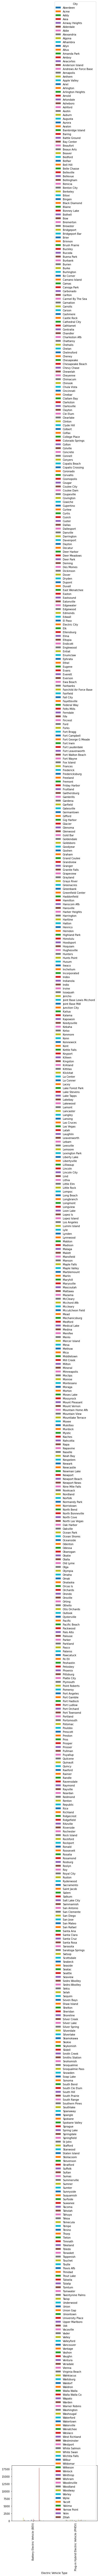

In [19]:
Result=pd.crosstab(index=df['Electric Vehicle Type'],columns=df['City'])
print(Result)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
%matplotlib inline 
Result.plot.bar()